# Project - Wrangle and Analyse Data (WeRate Dogs)
## Introduction: 
WeRateDogs (@dog_rates) [https://twitter.com/dog_rate] is a Twitter account  that rates people's dogs with a humorous comment about the dog. The twitter archive contains tweet data for over 5000+ tweets that includes information like individual comments, ratings and timestamp of users who posted the tweet and replied to it. Tweets that do not include any ratings are filtered out for our analysis.

Using, 'Tweepy' [http://www.tweepy.org] a python library for accessing the Twitter API, we can query additional information from the tweet archive such as the retweet count and favorites count. We can later read this JSON data into our pandas dataframe to perform our analysis. Additionally, we can classify the breed of dogs (via some form of neural network) and fetch them programtically through the 'Requests' Library [https://pypi.org/project/requests/] to include information such as images and predictions for dogs.

> <b>Objective:</b> Our objective is to gather, assess and clean this real-world data using various python libraries (like Numpy, Pandas, Requests, JSON and Tweepy). And to present our analysis and visualisations in a well documented manner including efforts put in the data-wrangling process and numerous insights gathered from these findings.

## Table of Contents
<ul>
<li><a href="#data-gathering">Gathering Data</a></li>
    <ul>
    <li><a href="#twitter-archive">Twitter Enhanced Archives: Using the Pandas Library</a></li>
    <li><a href="#twitter-image-predictions">Twitter Image Predictions: Using Requests Library</a></li>
    <li><a href="#enhanced-twitter-archive">Twitter Additional Data API: Using the Tweepy Library</a></li>
    </ul>
<li><a href="#data-assessment">Assessing Data</a></li>
<li><a href="#data-cleaning">Cleaning Data</a></li>
<ul>
    <li><a href="#quality-issues">Quality Issues (8)</a></li>
    <li><a href="#tidiness-issues">Tidiness Issues (2)</a></li>
</ul>    
<li><a href="#data-visualisation">Visualising Data</a></li>
<ul>
    <li><a href="#insight-1">Insight-1 and Visualisation</a></li>
    <li><a href="#insight-2">Insight-2 and Visualisation</a></li>
    <li><a href="#insight-3">Insight-3 and Visualisation</a></li>
    </ul>    
<li><a href="#references">References</a></li>
</ul>


<a id='data-gathering'></a>
## Gathering Data


In [166]:
# Importing the Required Libraries suitable for our given analysis
import numpy as np
import pandas as pd
import requests
import json
import time
import math
import re
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
%matplotlib inline

<a id='twitter-archive'></a>
### Twitter Enhanced Archives: Using the Pandas Library

In [3]:
# Reading the Twitter Enhanced Archives using the pd.read_csv() function
dfarch = pd.read_csv('twitter-archive-enhanced.csv', parse_dates=True)
dfarch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id='twitter-image-predictions'></a>
### Twitter Image Predictions: Using Requests Library



In [4]:
# Reading the Twitter Image Predictions using the Requests Library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.status_code
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
# Reading the Twitter Image Predictions file into an Pandas DataFrame
dfpred = pd.read_csv('image-predictions.tsv', sep='\t')
dfpred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='enhanced-twitter-archive'></a>
### Twitter Additional Data API: Using Tweepy Library





In [4]:
# Signing up for Twitter Developer account and Creating Application to generate access tokens
twitter_keys = {
        'CONSUMER_KEY': " ",
        'CONSUMER_TOKEN': " ",
        'ACCESS_TOKEN_KEY': " ",
        'ACCESS_TOKEN_SECRET': " " 
}
# Registering our Client Application with Twitter by passing the consumer tokens
auth = tweepy.OAuthHandler(twitter_keys['CONSUMER_KEY'], twitter_keys['CONSUMER_TOKEN'])
auth.set_access_token(twitter_keys['ACCESS_TOKEN_KEY'], twitter_keys['ACCESS_TOKEN_SECRET'])

# Setting the time-limits to automatically fetch data upon expiring of given timeframe
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Using TweetIDs for which we need to gather additional data via Twitter API
tweet_ids = dfarch.tweet_id.values
len(tweet_ids)

# Querying Twitter API for JSON data for each TweetID in the Twitter Archive
count = 0
fails_dict = {}
start = timer()
# Saving those returned tweets line by line into a suitable text file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 265


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 252


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [5]:
# Creating a list of dictionaries to read JSON line by line and later converting it to dataframe
df_list =[]

# Using json.loads() function to read file
with open('tweet_json.txt',encoding = 'utf-8') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        df_list.append({
            'tweet_id': json_data['id'],
            'favorites': json_data['favorite_count'],
            'retweets': json_data['retweet_count']})
                                      
# Creating a Pandas Dataframe with the selected appropriate columns  
dfapi = pd.DataFrame(df_list, columns=['tweet_id', 'favorites', 'retweets'])
dfapi.head()

,tweet_id,favorites,retweets
0,892420643555336193,36331,7729
1,892177421306343426,31306,5725
2,891815181378084864,23585,3787
3,891689557279858688,39627,7887
4,891327558926688256,37820,8515


<a id='data-assessment'></a>
## Assessing Data




In [38]:
# Printing the first few rows of the Twitter Archives using head() function
dfarch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Twitter Archive Columns (Explained)
- tweet_id: Unique Identifier
- in_reply_to_status_id: If Reply, Original TweetID 
- in_reply_to_user_id: If Reply, Original AuthorID
- timestamp: Time of Tweet
- source: Twitter for Android, Twitter for iPhone, Twitter Web Client
- text: Actual Tweet
- retweeted_status_id: If Retweet, Original TweetID
- retweeted_status_user_id: If Retweet, Original AuthorID
- retweeted_status_timestamp: Time of ReTweet
- expanded_urls: Tweet URL
- rating_numerator: Numerator of Rating
- rating_denominator: Denominator of Rating
- name: Name of Dog
- doggo: One of the 4 Dog Stage
- floofer: One of the 4 Dog Stage
- pupper: One of the 4 Dog Stage
- puppo: One of the 4 Dog Stage

In [23]:
# Printing the summary information of Twitter Archives using info() function  
dfarch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [25]:
# Printing the rows and columns for Twitter Archives using shape attribute
dfarch.shape

(2356, 17)

In [26]:
# Printing the summary statistics of Twitter Archives using describe() function
dfarch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [31]:
# Reading random samples from the Twitter Image Predictions using sample() function
dfpred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1074,717009362452090881,https://pbs.twimg.com/media/CfNUNetW8AAekHx.jpg,1,Siberian_husky,0.506154,True,Eskimo_dog,0.269656,True,malamute,0.060658,True
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,Chihuahua,0.718944,True,badger,0.178546,False,toy_terrier,0.037103,True
1458,777885040357281792,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True
1759,825829644528148480,https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg,2,Great_Pyrenees,0.853407,True,golden_retriever,0.053531,True,English_setter,0.045830,True
844,695074328191332352,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.510106,True,Tibetan_terrier,0.071981,True,Lhasa,0.069231,True


#### Tweet Predictions Columns (Explained)
- tweet_id: Unique Identifier
- jpg_url: Dog Image URL
- img_num: Image Number (1-4)
- p1: First Prediction for Image
- p1_conf: Confidence(%) First Prediction
- p2: Second Prediction for Image
- p2_conf: Confidence(%) Second Prediction
- p3: Third Prediction for Image
- p3_conf: Confidence(%) Third Prediction


In [33]:
# Printing the datatypes for Twitter Image Predictions using the dtypes attribute
dfpred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [49]:
# Printing the last few rows from Twitter Additional Data API using the tail() function
dfapi.tail()

,tweet_id,favorites,retweets
2325,666049248165822465,96,40
2326,666044226329800704,272,132
2327,666033412701032449,112,41
2328,666029285002620928,121,42
2329,666020888022790149,2423,463


#### Twitter API Columns (Explained)
- tweet_id: Unique Identifier
- favorites: Number of Likes by Users
- retweets: Number of Retweets by Users

In [6]:
# Sorting ratings(Numerator) in Twitter Archives using the value_counts() function
dfarch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [9]:
# Sorting ratings(Denominator) in Twitter Archives using the value_counts() function
dfarch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
# Sorting the names in Twitter Archives using the value_counts() function
dfarch.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
            ... 
Ben            1
Monty          1
Danny          1
Arlo           1
Enchilada      1
Name: name, Length: 957, dtype: int64

In [8]:
# Checking duplicate TweetIDs in Twitter Archives using duplicated() function
dfarch.tweet_id.duplicated().sum()

0

In [10]:
# Checking duplicate image URLs in Twitter Image Predictions using duplicated() function
dfpred.jpg_url.duplicated().sum()

66

In [41]:
# Finding unsual dog names in Twitter Archives using the len() and apply() function
dfarch[dfarch['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [12]:
# Checking records with retweets in Twitter Archives using notnull() function
dfarch[dfarch['retweeted_status_id'].notnull()]
dfarch[dfarch['retweeted_status_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


<a id='data-cleaning'></a>
## Cleaning Data


In [6]:
# Creating copies of Twitter Archives, Twitter Predictions, Twitter Data API before cleaning
archives_clean = dfarch.copy()
predictions_clean = dfpred.copy()
api_clean = dfapi.copy()

<a id='quality-issues'></a>
## Quality Issues
Incomplete, Inconsistent, Invalid Data (Content Issues)

**Twitter Archives**
1. retweeted_status_id and retweeted_status_user_id: Consists Retweets (Duplicates)
2. text: Getting rid of Retweets starting with 'RT' in Text Column
3. rating: Creating new Rating Column with Numerator & Denominator
4. rating_numerator, rating_denominator: Missing Column (Fraction)
5. name('None', 'a', 'an'): Invalid Names, Less than three characters
6. source: Removing HTTP Code in Source Column
7. in_reply_to_status_id, in_reply_to_user_id , timestamp: Have Erroneous Data Types
 
**Twitter Predictions** 
8. tweet_id: Missing Tweets across Archives and Predictions


### Issue #1: retweeted_status_id and retweeted_status_user_id: Consists Retweets (Duplicates)

#### Define
Keep only those rows in Twitter Archives that have original tweets OR Delete rows where (retweeted_status_id/retweeted_status_user_id) is not null.

#### Code

In [7]:
archives_clean = archives_clean[archives_clean.retweeted_status_id.isnull()]
archives_clean = archives_clean[archives_clean.retweeted_status_user_id.isnull()]

#### Test

In [8]:
len(archives_clean[archives_clean.retweeted_status_id.isnull() == False])
len(archives_clean[archives_clean.retweeted_status_user_id.isnull() == False])

0

### Issue #2: text: Getting rid of Retweets starting with 'RT' in Text Column

#### Define
The text column in Tweet Archives contains some Retweets that begin with 'RT' that need to be removed.

#### Code

In [9]:
archives_clean = archives_clean.loc[archives_clean['text'].str.startswith('RT') == False]

#### Test

In [10]:
archives_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #3: rating: Creating new Rating Column with Numerator & Denominator

#### Define

Creating new Rating Column in Tweet Archives with both Numerator and Denominator.

#### Code

In [11]:
rating = archives_clean.text.str.extract('(\d+(\.\d+)*\/\d+)')
archives_clean['rating'] = rating[0]

#### Test

In [12]:
archives_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,12/10


### Issue #4: rating_numerator, rating_denominator: Missing Column (Fraction)

#### Define
Create a new column for Fraction that includes (rating_numerator and rating_denominator).

#### Code

In [13]:
archives_clean['fraction'] = archives_clean['rating_numerator'].astype(float)/archives_clean['rating_denominator']

#### Test

In [14]:
archives_clean['fraction'].value_counts()

1.200000      503
1.000000      443
1.100000      431
1.300000      307
0.900000      156
0.800000       98
0.700000       53
1.400000       43
0.500000       37
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        7
42.000000       2
0.000000        2
0.818182        1
1.250000        1
66.600000       1
1.500000        1
inf             1
7.500000        1
177.600000      1
2.600000        1
3.428571        1
0.636364        1
1.700000        1
0.733333        1
2.700000        1
18.200000       1
Name: fraction, dtype: int64

### Issue #5: name('None', 'a', 'an'): Invalid Names, Less than three characters

#### Define
Handling invalid names ('None', 'a', 'an') and replacing them with 'None'

#### Code

In [15]:
dognames = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']

for word in dognames:
    archives_clean.loc[archives_clean.name == word, 'name'] = None

#### Test

In [16]:
archives_clean['name'].value_counts()

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Tucker      9
           ..
Monkey      1
Tobi        1
Marvin      1
Yoda        1
Grady       1
Name: name, Length: 942, dtype: int64

### Issue #6: source: Removing HTTP Code in Source Column

#### Define
Removing HTTP Code from Source Column in Tweet Archives using regular expressions.

#### Code

In [17]:
archives_clean['source'] = archives_clean['source'].str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', expand = True)[4];
archives_clean['source'] = archives_clean['source'].astype('category')

#### Test

In [18]:
archives_clean.source.value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #7: in_reply_to_status_id, in_reply_to_user_id , timestamp: Have Erroneous Data Types

#### Define
Converting in_reply_to_status_id and in_reply_to_user_id from float64 to int64 data type and timestamp from object to datetime data type.

#### Code

In [19]:
archives_clean.in_reply_to_status_id = archives_clean.in_reply_to_status_id.fillna(0)
archives_clean.in_reply_to_user_id = archives_clean.in_reply_to_user_id.fillna(0)
archives_clean.in_reply_to_status_id = archives_clean.in_reply_to_status_id.astype(np.int64)
archives_clean.in_reply_to_user_id = archives_clean.in_reply_to_user_id.astype(np.int64)
archives_clean.timestamp = pd.to_datetime(archives_clean.timestamp)

#### Test

In [20]:
archives_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                       int64
in_reply_to_user_id                         int64
timestamp                     datetime64[ns, UTC]
source                                   category
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
rating                                     object
fraction                                  float64
dtype: object

### Issue #8: tweet_id: Missing Tweets across Archives and Predictions

#### Define
Keep only those tweets in Twitter Archives Dataframe whose IDs exist in Twitter Predictions.

#### Code

In [21]:
archives_clean = archives_clean[archives_clean.tweet_id.isin(predictions_clean.tweet_id)]

#### Test

In [22]:
len(archives_clean[~archives_clean.tweet_id.isin(predictions_clean.tweet_id)])

0

<a id='tidiness-issues'></a>
## Tidiness Issues
Untidy Data (Structural Issues)

1. Drop any unncessary columns from the Twitter Archives Dataframe.
2. Combining Dog Stages (Floofer/Pupper/Puppo/Doggo) into single column.
3. Join the Twitter API and Twitter Predictions datasets to Twitter Archives.

### Issue-1: Drop any unnecessary columns from the Twitter Archives Dataframe

#### Define
Dropping few unnecessary columns in the Twitter Archives that aren't required for analysis.

#### Code

In [23]:
archives_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [24]:
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1993 non-null   int64              
 1   timestamp           1993 non-null   datetime64[ns, UTC]
 2   source              1993 non-null   category           
 3   text                1993 non-null   object             
 4   expanded_urls       1993 non-null   object             
 5   rating_numerator    1993 non-null   int64              
 6   rating_denominator  1993 non-null   int64              
 7   name                1361 non-null   object             
 8   doggo               1993 non-null   object             
 9   floofer             1993 non-null   object             
 10  pupper              1993 non-null   object             
 11  puppo               1993 non-null   object             
 12  rating              1993 non-null 

### Issue-2: Combining Dog Stages (Floofer/Pupper/Puppo/Doggo) into single column.

#### Define
Combining the various dog stages like Doggo/Floofer/Pupper/Puppo in a single column.

#### Code

In [25]:
archives_clean['dog_stages'] = archives_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
archives_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [83]:
archives_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,fraction,dog_stages
1555,688894073864884227,2016-01-18 01:22:00+00:00,Twitter for iPhone,This is Hamrick. He's covered in corn flakes. ...,https://twitter.com/dog_rates/status/688894073...,7,10,Hamrick,7/10,0.7,pupper
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,6/10,0.6,NaN
639,793256262322548741,2016-11-01 01:00:05+00:00,Twitter for iPhone,Oh h*ck look at this spookling right here. Fri...,https://twitter.com/dog_rates/status/793256262...,12,10,None,12/10,1.2,NaN
1468,694206574471057408,2016-02-01 17:11:59+00:00,Twitter for iPhone,"""Martha come take a look at this. I'm so fed u...",https://twitter.com/dog_rates/status/694206574...,10,10,None,10/10,1.0,NaN
2029,671855973984772097,2015-12-02 00:58:41+00:00,Twitter for iPhone,Remarkable dog here. Walks on back legs really...,https://twitter.com/dog_rates/status/671855973...,8,10,None,8/10,0.8,NaN


### Issue-3: Join the Twitter API and Twitter Predictions datasets to Twitter Archives.

#### Define
Merging the archives_clean, predictions_clean and api_clean dataframes using pd.merge() function.

#### Code

In [26]:
# Merging the Twitter Archives with Twitter Predictions
combine_df = pd.merge(archives_clean, predictions_clean, how = 'inner', on = ['tweet_id']).copy()

# Merging Combined Dataframe with Twitter API
combine_df = pd.merge(combine_df, api_clean, how = 'inner', on = ['tweet_id']).copy()

#### Test

In [27]:
combine_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,fraction,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13/10,1.3,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36331,7729
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,1.3,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,31306,5725
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,1.2,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23585,3787
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,1.3,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39627,7887
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,1.2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37820,8515


## Save the Cleaned Data
### Creating the Master Dataset for Visualisation and Insights

In [149]:
combine_df.to_csv('twitter_archive_master.csv', index=False)

<a id='data-visualisation'></a>
## Visualising Data

### Reading data from master dataset into individual data frame

In [150]:
tweets = pd.read_csv('twitter_archive_master.csv')

<a id='insight-1'></a>
### Insight-1 and Visualisation: Which is the most preferred source for tweeting?

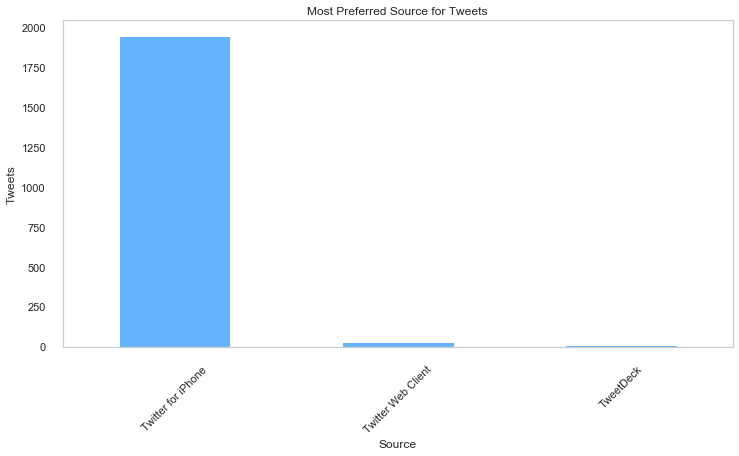

In [204]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_style("whitegrid")
my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
sns.color_palette(my_palette)
tweets.source.value_counts().plot.bar()
plt.xticks(rotation=45)
plt.xlabel('Source')
plt.ylabel('Tweets')
plt.title('Most Preferred Source for Tweets')
plt.grid(b=None)
plt.show()

Twitter for iPhone is most preferred source.

<a id='insight-2'></a>
### Insight-2 and Visualisation: What are the most popular dog stages?

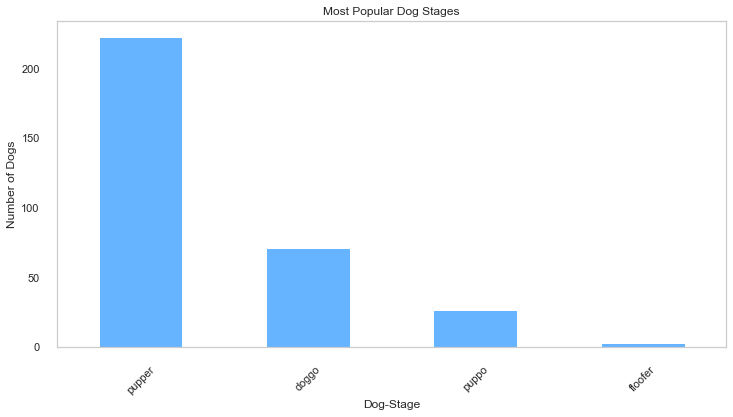

In [199]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_style("whitegrid")
my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
sns.color_palette(my_palette)
tweets.dog_stages.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Dog-Stage')
plt.xticks(rotation=45)
plt.ylabel('Number of Dogs')
plt.title('Most Popular Dog Stages')
plt.grid(b=None)
plt.show()

Pupper is most popular, followed by doggo.

<a id='insight-3'></a>
### Insight-3 and Visualisation: What are the most common dog names?

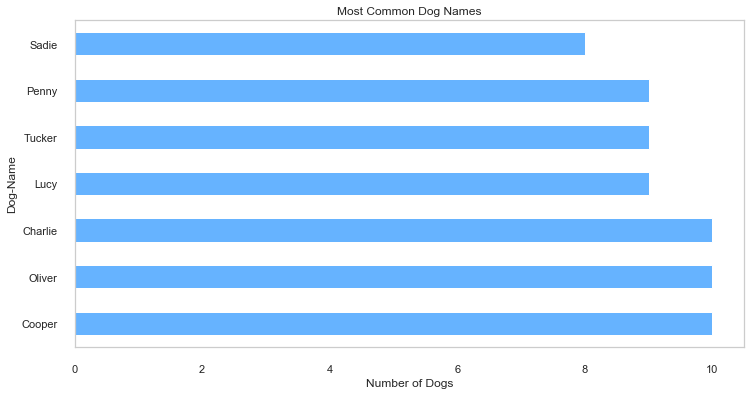

In [200]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_style("whitegrid")
my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
sns.color_palette(my_palette)
tweets.name.value_counts()[0:7].sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Number of Dogs')
plt.ylabel('Dog-Name')
plt.title('Most Common Dog Names')
plt.grid(b=None)
plt.show()

Cooper, Oliver, Charlie are common dog names among pet lovers.

<a id='references'></a>
## References

1. Hiding API Keys in Python (https://towardsdatascience.com/how-to-hide-your-api-keys-in-python-fb2e1a61b0a0)
2. Tweepy Library for Beginners (https://towardsdatascience.com/tweepy-for-beginners-24baf21f2c25)
3. Handling JSON Data in Python (https://medium.com/swlh/handle-json-data-using-json-and-pandas-in-python-9ff6bbd0d356)
4. Data Preparation using Pandas (https://www.datacamp.com/community/tutorials/data-preparation-with-pandas)
5. Data Handling using Pandas (https://towardsdatascience.com/data-handling-using-pandas-cleaning-and-processing-3aa657dc9418)
6. Data Cleaning with Pandas (https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)
7. Data Visualisation using Pandas (https://towardsdatascience.com/data-visualization-exploration-using-pandas-only-beginner-a0a52eb723d5)
8. Data Visualisation using Matplotlib (https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70)
